# Solve of the polytropic model



We need to solve Lane-Emden equations with the following contour conditions by applying Runge Kutta:

$$
\frac{2}{\xi}\frac{d\theta}{d\xi}+\frac{d^{2}\theta}{d\xi^{2}}=-\theta^{n}
$$
$$
\theta(\xi=0)=1\,\frac{d\theta}{d\xi}(\xi=0)=0
$$

Integration will last from 1 to $\theta<0$ ($r=R$)

In [37]:
#Needed packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


To do 4th order RK de 4o we have to have 1st order ODEs. So we change variables:

$$
\frac{d\theta}{d\xi}\equiv\tau(\xi)
$$
$$
\frac{d\tau}{d\xi}=-\theta^{n}(\xi)-\frac{2}{\xi}\tau(\xi)
$$
$$
\tau(0)=0\quad\theta(0)=1
$$

In [38]:


def dtau(x,n,th,tau):
    return(-(th**n)-(2/x)*tau)

def RK(n):
    #We define a step of .01
    xi=np.array([1e-50])
    th=np.array([1.])
    tau=np.array([0.])
    h=0.01
    #Since on n=5 th>0 always, we stop at a certain value of xi
    while (th[-1]>0)and(xi[-1]<=50):
        #We create a vector k_i=[k,l], such that k[0] stands for theta and k[1] stands for tau
        k1=np.array([tau[-1],dtau(xi[-1],n,th[-1],tau[-1])])
        k2=np.array([tau[-1]+h*k1[1]/2,dtau(xi[-1]+h/2,n,th[-1]+h*k1[0]/2,tau[-1]+h*k1[1]/2)])
        k3=np.array([tau[-1]+h*k2[1]/2,dtau(xi[-1]+h/2,n,th[-1]+h*k2[0]/2,tau[-1]+h*k2[1]/2)])
        k4=np.array([tau[-1]+h*k3[1],dtau(xi[-1]+h,n,th[-1]+h*k3[0],tau[-1]+h*k3[1])])
        #Now we compute the step
        xi=np.append(xi,xi[-1]+h)
        th=np.append(th,th[-1]+(h/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0]))
        tau=np.append(tau,tau[-1]+(h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1]))
        
    return(xi,th,tau)

On analytic way, we know that:
$$
\theta_{n=0}=1-\frac{\xi^{2}}{6}\quad\xi_{1}=\sqrt{6}
$$
$$
\theta_{n=1}=\frac{\sin{\xi}}{\xi}\quad\xi_{1}=\pi
$$

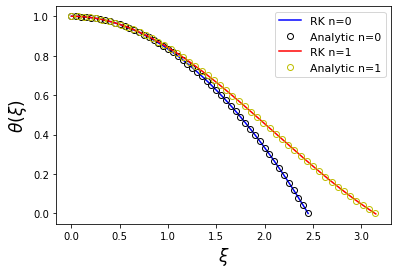

In [39]:
xi0,th0,tau0=RK(0)
xi1,th1,tau1=RK(1)
xi0_teo=np.linspace(0,np.sqrt(6),50) #xi1=sqrt(6) for n=0
th0_teo=np.array([1-i**2/6 for i in xi0_teo])
xi1_teo=np.linspace(0,np.pi,50) #xi1=pi for n=1
th1_teo=np.array([])
for i in xi1_teo:
    if i==0:
        th1_teo=np.append(th1_teo,1) #At xi=0 we have an indetermination, with a known value of 1
    else:
        th1_teo=np.append(th1_teo,np.sin(i)/i)
        
plt.plot(xi0,th0,'b-',label='RK n=0')
plt.plot(xi0_teo,th0_teo,'ko',fillstyle='none',label='Analytic n=0')
plt.plot(xi1,th1,'r-',label='RK n=1')
plt.plot(xi1_teo,th1_teo,'yo',fillstyle='none',label='Analytic n=1')
plt.gca().set_xlabel(r'$\xi$',fontsize=17)
plt.gca().set_ylabel(r'$\theta(\xi)$',fontsize=17)
plt.legend(fontsize=11)
plt.show()

Since things go well, we compute from n=0 to n=5

In [13]:
#We build a data frame with all the needed values: 
#n, xi, theta, tau, Dn, Mn, Rn, and Bn
#First we define the polytropic quantities
def Dn(xi,tau):
    #Since some quantities are problematic in half-integer, we take the -2 value
    dt=tau[-2] 
    return(-((3/xi[-2])*dt)**(-1))

def Mn(xi,tau):
    return(-xi[-2]**2*tau[-2])

def Rn(xi):
    return(xi[-2])

def Bn(n,xi,tau):
    #We know that, for n=0, Bn=1
    if n==0:
        return(1)
    else:
        num=(3*Dn(xi,tau))**((3-n)/(3*n))
        den=(n+1)*Mn(xi,tau)**((n-1)/n)*Rn(xi)**((3-n)/n)
        return(num/den)
    
politropo=pd.DataFrame(columns=['n','xi','theta','tau','Dn','Mn','Rn','Bn'])
for i in np.arange(0,5.5,0.5):
    xi,th,tau=RK(i)
    politropo=politropo.append({'n':i,'xi':xi,'theta':th,'tau':tau,'Dn':Dn(xi,tau),
                               'Mn':Mn(xi,tau),'Rn':Rn(xi),'Bn':Bn(i,xi,tau)},
                              ignore_index=True)

politropo

/var/folders/80/krnrm_mx6k94b813wbyxjpvw0000gn/T/ipykernel_35272/509404149.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return(-(th**n)-(2/x)*tau)


,n,xi,theta,tau,Dn,Mn,Rn,Bn
0,0.0,"[1e-50, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000...","[1.0, 0.99995, 0.9999148148148148, 0.999837592...","[0.0, 0.0, -0.005740740740740742, -0.009586419...",1.000000,4.842261,2.44,1
1,0.5,"[1e-50, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000...","[1.0, 0.9999500002083347, 0.9999148159259388, ...","[0.0, -4.1666145846145734e-08, -0.005740574071...",1.829997,3.788144,2.75,0.274341
2,1.0,"[1e-50, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000...","[1.0, 0.9999500004166667, 0.9999148170370039, ...","[0.0, -8.333333333313913e-08, -0.0057404074109...",3.284871,3.141589,3.14,0.233097
3,1.5,"[1e-50, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000...","[1.0, 0.9999500006249961, 0.9999148181480101, ...","[0.0, -1.250015624876255e-07, -0.0057402407577...",5.972259,2.714055,3.65,0.20558
4,2.0,"[1e-50, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000...","[1.0, 0.999950000833323, 0.9999148192589576, 0...","[0.0, -1.6667083333328968e-07, -0.005740074112...",11.379962,2.411047,4.35,0.185385
5,2.5,"[1e-50, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000...","[1.0, 0.9999500010416471, 0.9999148203698461, ...","[0.0, -2.0834114589825723e-07, -0.005739907474...",23.337345,2.187201,5.35,0.169566
6,3.0,"[1e-50, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000...","[1.0, 0.9999500012499688, 0.999914821480676, 0...","[0.0, -2.5001250020917353e-07, -0.005739740844...",54.021197,2.018237,6.89,0.15654
7,3.5,"[1e-50, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000...","[1.0, 0.9999500014582877, 0.9999148225914469, ...","[0.0, -2.916848962897234e-07, -0.0057395742223...",152.604507,1.890558,9.53,0.145343
8,4.0,"[1e-50, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000...","[1.0, 0.9999500016666042, 0.9999148237021591, ...","[0.0, -3.3335833416655215e-07, -0.005739407607...",622.214647,1.797231,14.97,0.135299
9,4.5,"[1e-50, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000...","[1.0, 0.999950001874918, 0.9999148248128126, 0...","[0.0, -3.750328138677854e-07, -0.0057392410012...",6185.701064,1.737800,31.83,0.125788


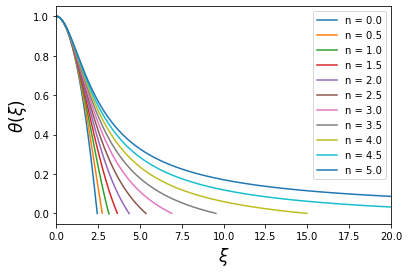

In [14]:
for i in np.arange(0,11):
    plt.plot(politropo.iloc[i]['xi'],politropo.iloc[i]['theta'],label='n = '+str(politropo.iloc[i]['n']))
    
plt.gca().set_xlabel(r'$\xi$',fontsize=17)
plt.gca().set_ylabel(r'$\theta(\xi)$',fontsize=17)
plt.xlim(0,20)
plt.legend()
plt.show()

Lets play with White Dwarfs.
<img src="meme.jpeg">
We compute non-relativistic white dwarfs radius and mass (n=1.5) with $\mu_{e}=2$ , $\rho_{c}=10^{9}$ and $5\times10^{9}$ kg m$^{-3}$.

Then, we will plot $\log{\rho}$ and $m/M_{\odot}$ in terms of $r/R_{\odot}$.

Since we are with a non-relativistic fully degenerate case:

$$
P=K_{nr}\left(\frac{\rho}{\mu_{e}}\right)^{5/3}\rightarrow K_{pol}=\frac{K_{nr}}{\mu_{e}^{5/3}}
$$

Now we can obtain $\alpha$ and, with it, all the rest
$$
\alpha^{2}=\frac{(n+1)K}{4\pi G\rho_{c}^{\frac{n-1}{n}}}=\frac{2.5K}{4\pi G\rho_{c}^{1/3}}
$$

$$
R=\alpha\xi_{1} \quad M=-4\pi\alpha^{3}\rho_{c}\xi_{1}^{2}\left(\frac{d\theta}{d\xi}\right)_{\xi_{1}}=4\pi\alpha^{3}\rho_{c}M_{1.5}
$$



In [40]:
G=6.67e-11; Knr=1e7; mue=2; Msol=1.98e30; Rsol=6.96e8; rhoc=[1e9,5e9]
K=Knr/(mue**(5/3))
al2=[2.5*K/(4*np.pi*G*i**(1/3)) for i in rhoc]; al=np.sqrt(al2)
xi115=float(politropo[politropo['n']==1.5]['Rn']); M15=float(politropo[politropo['n']==1.5]['Mn'])
R=xi115*al; M=np.array([4*np.pi*rhoc[i]*(al[i]**3)*M15 for i in np.arange(2)])
print('R = '+str(R)+' m = '+str(R/Rsol)+' Rsun')
print('M = '+str(M)+' kg = '+str(M/Msol)+' Msun')

R = [11187593.81324765  8555426.98806182] m = [0.01607413 0.01229228] Rsun
M = [9.82109840e+29 2.19606436e+30] kg = [0.49601507 1.10912342] Msun


White dwarfs also have to fullfill
$$
MR^{-3}=\frac{4\pi}{3}\rho_{c}D_{1.5}^{-1}
$$

Let's see the deviation

$$
\Delta_{rel}=\frac{MR^{-3}-\frac{4\pi}{3}\rho_{c}D_{1.5}^{-1}}{\frac{4\pi}{3}\rho_{c}D_{1.5}^{-1}}
$$

In [41]:
Delrel=np.array([])
D15=float(politropo[politropo['n']==1.5]['Dn'])
for i in np.arange(2):
    teo=(4*np.pi/3)*rhoc[i]/D15
    Delrel=np.append(Delrel,(M[i]*(R[i]**-3)-teo)/teo)
    
print(r'$\Delta_{rel}$ = '+str(Delrel*100)+' %')

$\Delta_{rel}$ = [3.39930477e-14 0.00000000e+00] %


Finally, we plot by using

$$
\rho=\rho_{c}\theta^{n}\rightarrow \log{\rho}=\log{\rho_{c}}+1.5\log{\theta(\xi)}
$$
$$
m=-4\pi\alpha^{3}\rho_{c}\xi^{2}\left(\frac{d\tau}{d\xi}\right)_{\xi}=-4\pi\alpha^{3}\rho_{c}\xi^{2}\tau(\xi)
$$

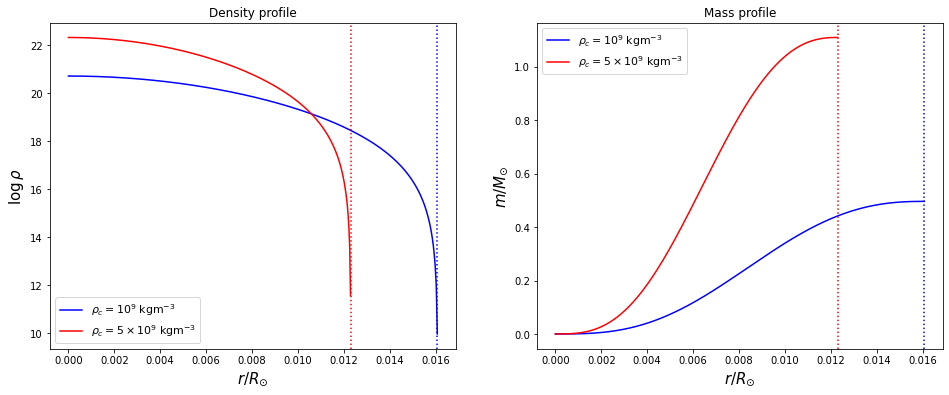

In [42]:
xi15=politropo.iloc[3]['xi']; th15=politropo.iloc[3]['theta']; tau15=politropo.iloc[3]['tau']
lrho1=np.log(rhoc[0])+1.5*np.log(th15)
lrho2=np.log(rhoc[1])+1.5*np.log(th15)
m1_msun=-4*np.pi*(al[0]**3)*rhoc[0]*(xi15**2)*tau15/Msol
m2_msun=-4*np.pi*(al[1]**3)*rhoc[1]*(xi15**2)*tau15/Msol
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax1.plot(al[0]*xi15/Rsol,lrho1,'b-',label=r'$\rho_{c}=10^{9}$ kgm$^{-3}$')
ax1.plot(al[1]*xi15/Rsol,lrho2,'r-',label=r'$\rho_{c}=5\times10^{9}$ kgm$^{-3}$')
ax1.axvline(x=R[0]/Rsol,ls=':',color='b')
ax1.axvline(x=R[1]/Rsol,ls=':',color='r')
ax1.set_xlabel(r'$r/R_{\odot}$',fontsize=15)
ax1.set_ylabel(r'$\log{\rho}$',fontsize=15)
ax1.legend(fontsize=11)
ax1.set_title('Density profile')
ax2=fig.add_subplot(122)
ax2.plot(al[0]*xi15/Rsol,m1_msun,'b-',label=r'$\rho_{c}=10^{9}$ kgm$^{-3}$')
ax2.plot(al[1]*xi15/Rsol,m2_msun,'r-',label=r'$\rho_{c}=5\times10^{9}$ kgm$^{-3}$')
ax2.set_xlabel(r'$r/R_{\odot}$',fontsize=15)
ax2.set_ylabel(r'$m/M_{\odot}$',fontsize=15)
ax2.axvline(x=R[0]/Rsol,ls=':',color='b')
ax2.axvline(x=R[1]/Rsol,ls=':',color='r')
ax2.set_title('Mass profile')
ax2.legend(fontsize=11)
plt.savefig('Profiles.png',transparent=False,backend=None,facecolor='w')
plt.show()